In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df=pd.read_csv("C:\\Users\\naasa\\OneDrive\\Desktop\\Entri\\machine learning\\Machine learning Task\\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


## Mean function -Outlier detection and removal

In [9]:
#calculate mean
mean_pps = df["price_per_sqft"].mean()
mean_pps

7920.336742424242

In [12]:
#std deviation
std_pps = df["price_per_sqft"].std()
std_pps

106727.16032810867

In [13]:
threshold = 3

In [22]:
#detect outliers
outliers_mean=df[(df["price_per_sqft"]<mean_pps-threshold*std_pps)|(df["price_per_sqft"]>mean_pps+threshold*std_pps)]
outliers_mean

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [23]:
#remove outliers
df_cleaned_mean=df[~df["price_per_sqft"].isin(outliers_mean["price_per_sqft"])]

### number of outlier detected is : 

In [24]:
len(outliers_mean)

5

### Percentile method - Outlier removal

In [28]:
upper_limit = df["price_per_sqft"].quantile(0.95)
lower_limit = df["price_per_sqft"].quantile(0.05)
print(upper_limit)
print(lower_limit)

15312.099999999984
3107.8500000000004


In [32]:
#detect outliers
outliers_percentile=df[(df["price_per_sqft"]<lower_limit)|(df["price_per_sqft"]>upper_limit)]
outliers_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [31]:
# remove outliers
df_cleaned_percentile=df[~df["price_per_sqft"].isin(outliers_percentile["price_per_sqft"])]

In [33]:
print(f"Total number of outliers using percentile method: {len(outliers_percentile)}")

Total number of outliers using percentile method: 1320


### Inter Quartile range IQR method

In [34]:
q1 = df["price_per_sqft"].quantile(0.25)
q3 = df["price_per_sqft"].quantile(0.75)

In [35]:
print(q1)
print(q3)

4267.0
7317.0


In [37]:
IQR = q3-q1
IQR

3050.0

In [38]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-308.0
11892.0


In [39]:
#detect outliers
outliers_IQR=df[(df["price_per_sqft"]<lower_limit)|(df["price_per_sqft"]>upper_limit)]
outliers_IQR

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [40]:
df_cleaned_IQR = df[~df["price_per_sqft"].isin(outliers_IQR["price_per_sqft"])]

In [41]:
len(df_cleaned_IQR)

11935

In [42]:
print(f"No. of outliers {len(outliers_IQR)}")

No. of outliers 1265


### Normal Distribution

In [44]:
mean_nd = df["price_per_sqft"].mean()
std_nd = df["price_per_sqft"].std()
print(mean_nd)
print(std_nd)

7920.336742424242
106727.16032810867


In [45]:
df['z-score'] = (df['price_per_sqft']-mean_nd)/std_nd

In [46]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [47]:
threshold_nd = 3

In [51]:
outliers_nd = df[(df["z-score"]>threshold_nd)|(df["z-score"]<-threshold_nd)]
outliers_nd

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [54]:
#Step3 : Remove outliers
df_cleaned_nd = df[(df["z-score"] <= threshold_nd)&(df["z-score"] >= -threshold_nd)]

In [55]:
print(f"Total outliers {len(outliers_nd)}")

Total outliers 5


### Z score method

In [58]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from scipy.stats import zscore

In [60]:
df["z-score_function"]=zscore(df["price_per_sqft"])
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score,z-score_function
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390,-0.034391
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299,0.023300


In [63]:
threshold_zscore = 3
outliers_zscore=df[(df["price_per_sqft"]>threshold_zscore)|(df["price_per_sqft"]<-threshold_zscore)]
outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score,z-score_function
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390,-0.034391
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299,0.023300


In [64]:
# remove outliers
df_cleaned_zscore=df[~df["price_per_sqft"].isin(outliers_zscore["price_per_sqft"])]

In [66]:
print(f"Number of outliers detected using Zscore method : {len(outliers_zscore)}")

Number of outliers detected using Zscore method : 13200


## Box plot

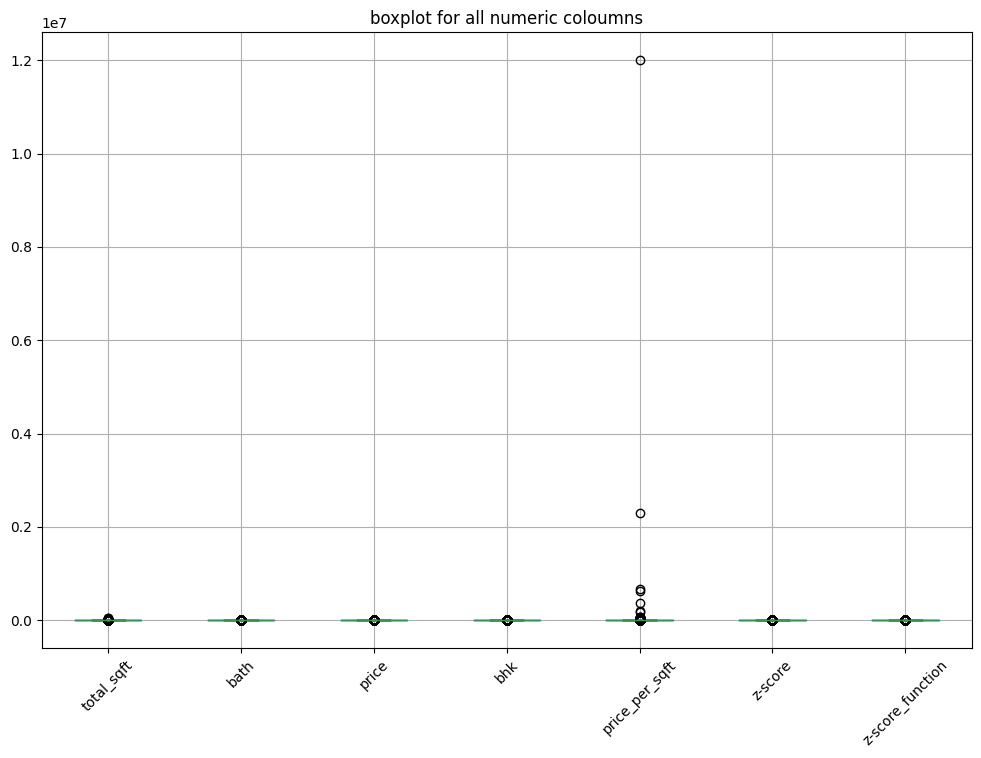

In [67]:
df.boxplot(figsize = (12,8))
plt.title("boxplot for all numeric coloumns")
plt.xticks(rotation=45)
plt.show()

## Histplot for price per sqft coloumn

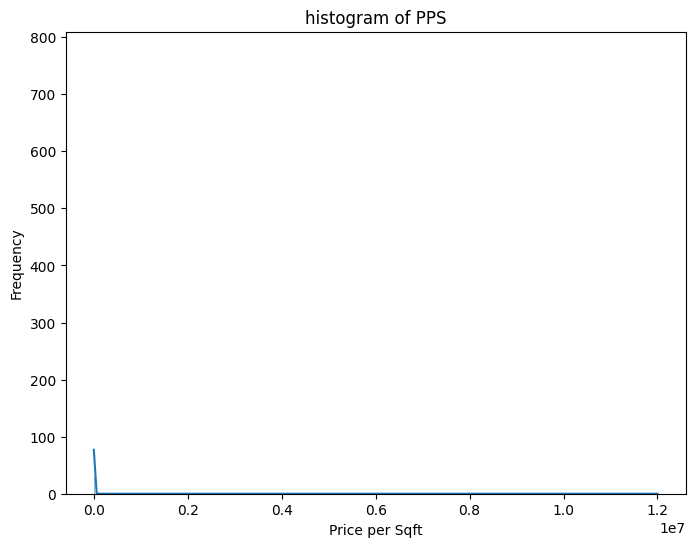

In [68]:
plt.figure(figsize = (8,6))
sns.histplot(df['price_per_sqft'],kde=True)
plt.title("histogram of PPS")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

## Correlation between numeric columns and plot heatmap

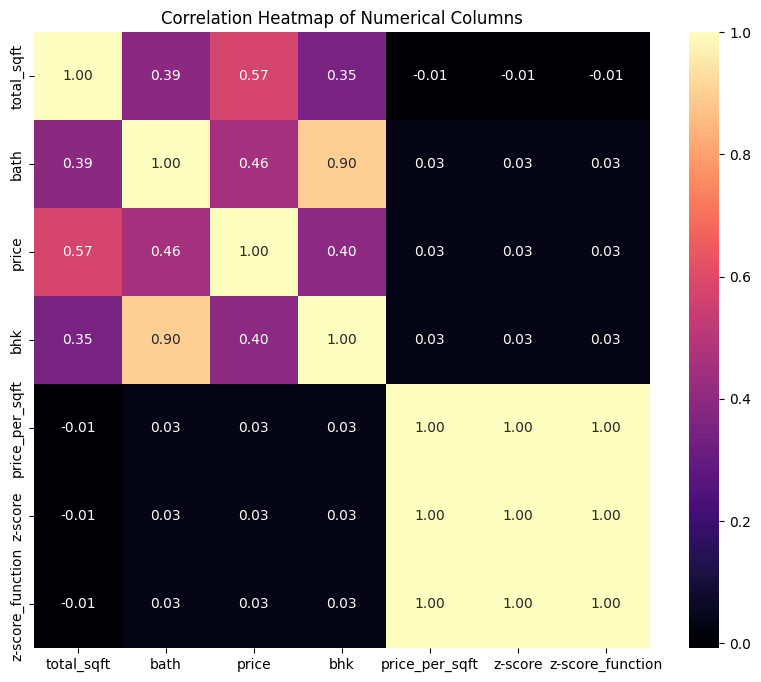

In [74]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### Scatterplot between variables to check correltaion between them

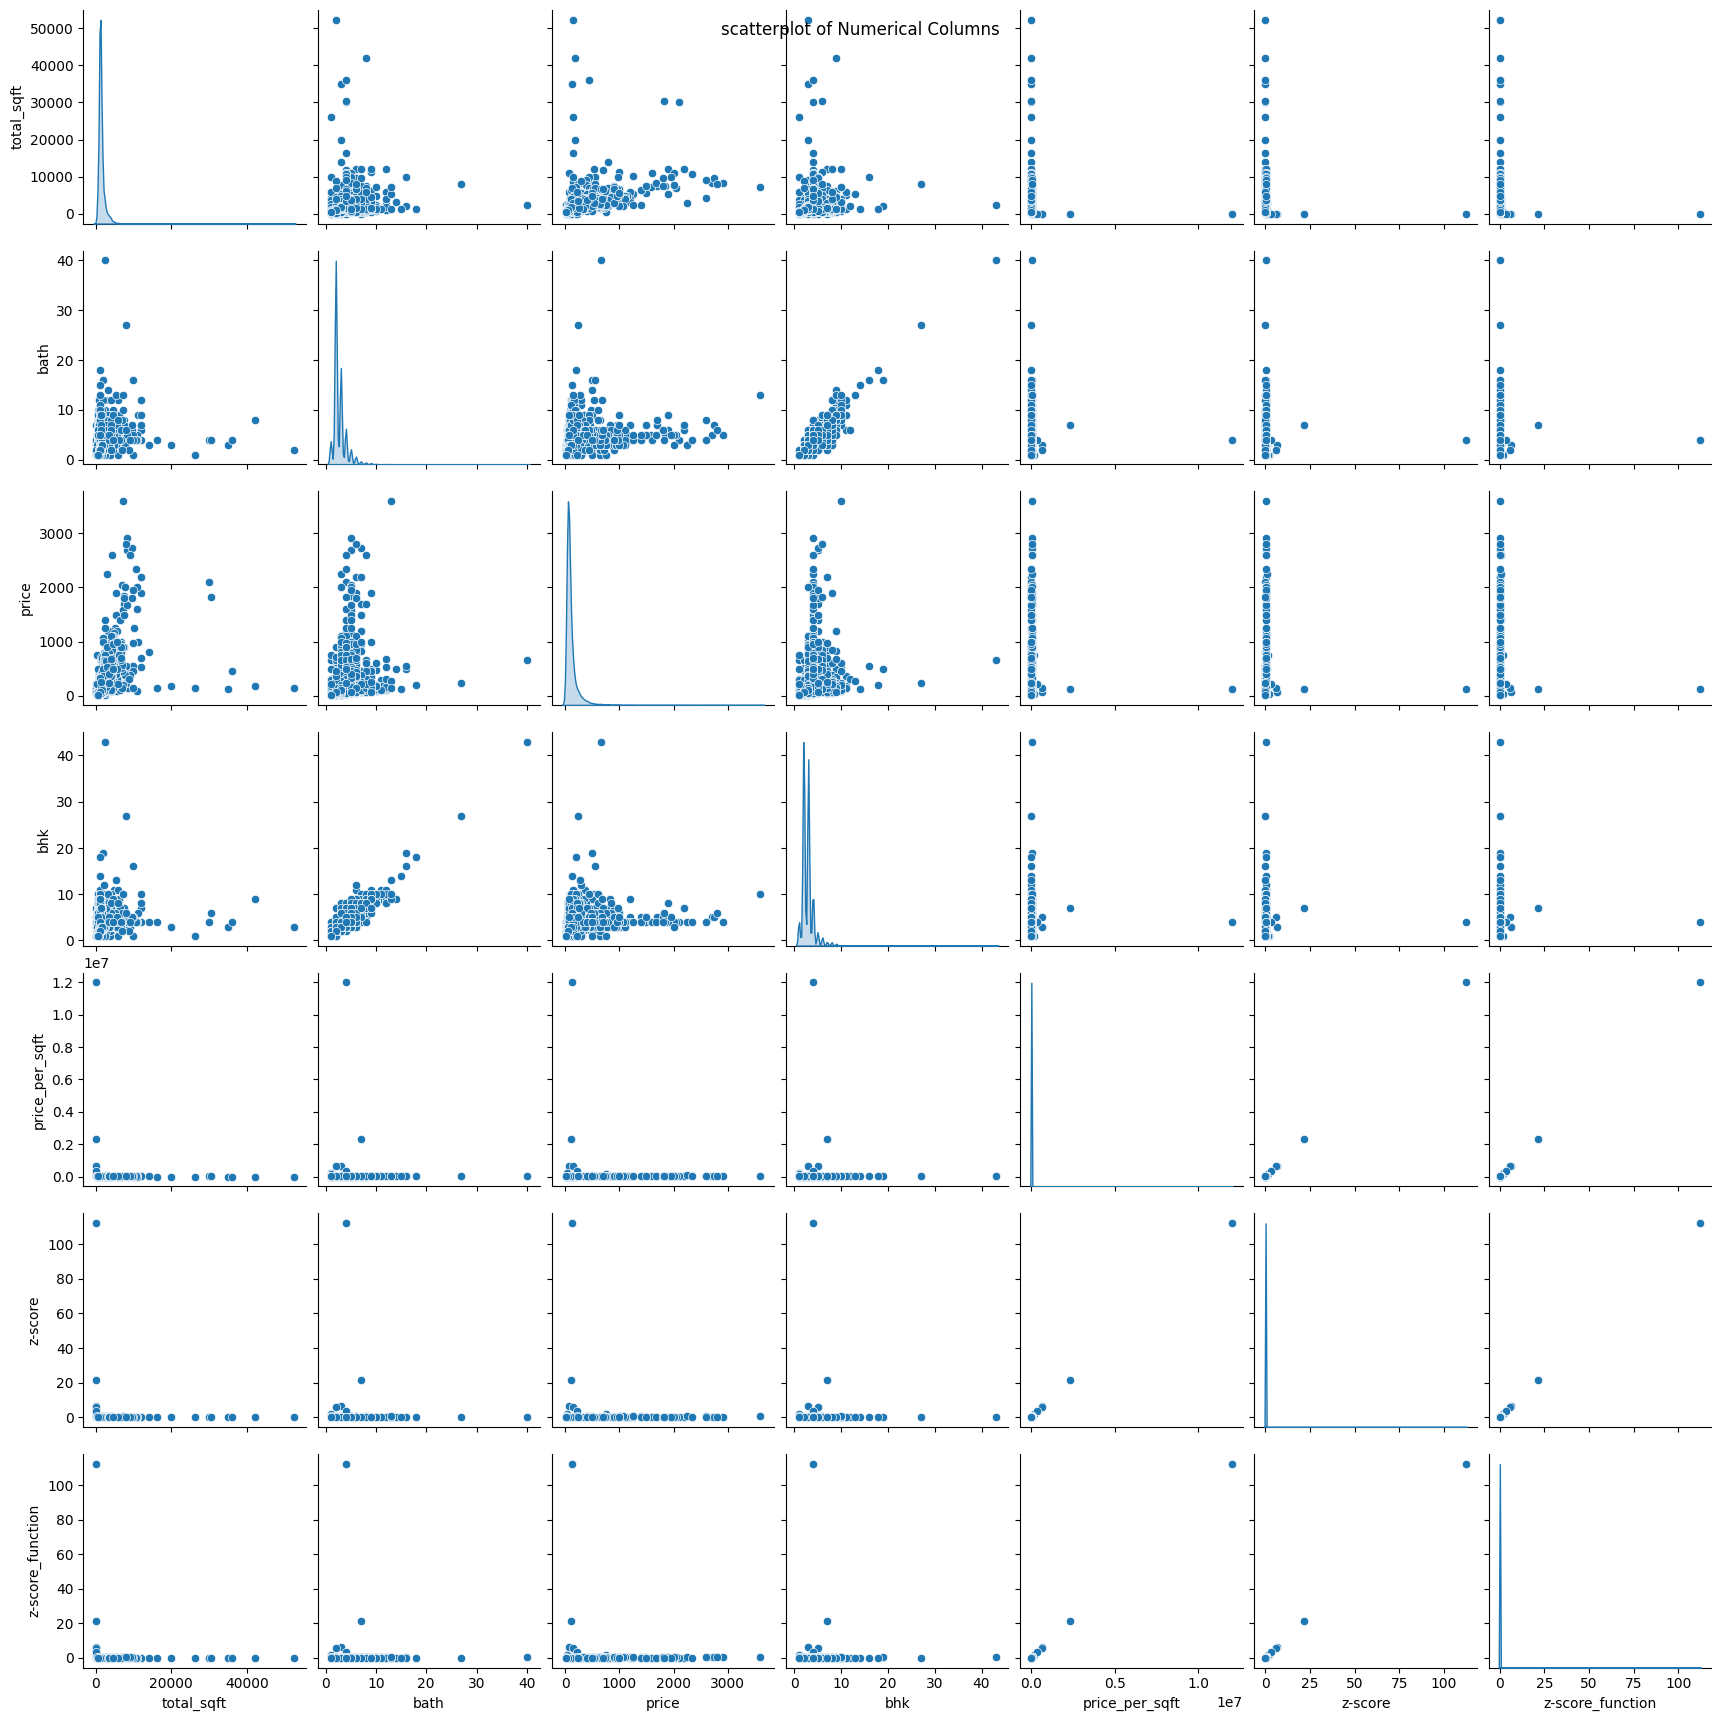

In [76]:
# Create a pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('scatterplot of Numerical Columns')
plt.show()